# CSE 555 Introduction to Pattern Recognition Spring 2020
# Problem Set 2 - Linear Discriminant Functions and SVM
## Srisai Karthik Neelamraju, 50316785 neelamra@buffalo.edu

### Importing the required libraries

NumPy is used for basic matrix operations.<br>
Scikit-learn is used to implement SVC and to evaluate the accuracy and confusion matrix for the performance on the test set.<br>
TensorFlow is used to import the MNIST dataset.<br>

In [1]:
import numpy as np
from sklearn import metrics, svm
import tensorflow as tf
from tensorflow.keras.datasets import mnist

### Loading the MNIST dataset

MNIST Dataset contains 28 $\times$ 28 dimensional grayscale images of handwritten digits from 0 to 9. Specifically, there are 60,000 images in the training set and 10,000 images in the test set. Each of these 70,000 images belongs to one of these 10 classes and has associated with it a label from 0 to 9.

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

### Reshaping and Normalizing the training and test data

In [3]:
img_dims = X_train.shape[-2:]
img_len = img_dims[0] * img_dims[1]

# reshaping the training and test data
X_train = X_train.reshape(X_train.shape[0], img_len)
X_test = X_test.reshape(X_test.shape[0], img_len)

# normalizing the training and test data
X_train =  X_train / 255
X_test = X_test / 255

## 1. Implementing a multi-class Support Vector Classifier on the MNIST dataset

Scikit-learn's LinearSVC() method is used to define a multi-class support vector classifier with dot-product (linear) kernel and 1-norm soft margin. First, this SVM model is fitted to the training data consisting of 60,000 images. Later, using the trained classifier, the labels are predicted for the 10,000 examples in the test set. Finally, these estimated outputs are used to analyze the performance of the classifier in terms of the accuracy as well as the confusion matrix on the test set. Different values of the hyperparameter 'C' that sets the trade-off between the margin and the training error were tried, and the following results were observed. For the implementation herewith, the value of 'C' that gave the highest cross validation accuracy was considered.

| C | Train Accuracy | CV Accuracy |
| --- | --- | --- |
| 0.001 | 89.75% | 90.42% |
| 0.01 | 91.66% | 91.78% |
| 0.05 | 92.33% | 92.19% |
| 0.09 | 92.49% | 92.26% |
| __0.1__ | __92.52%__ | __92.29%__ |
| 0.11 | 92.55% | 92.25% |
| 0.2 | 92.66% | 92.22% |
| 0.5 | 92.87% | 92.17% |
| 1 | 92.96% | 92.18% |
| 10 | 93.15% | 92.18% |

In [4]:
# defining a support vector classifier
svc = svm.LinearSVC(penalty='l2', loss='hinge', C=0.1, max_iter=1000000)

# fitting the model to the training data
svc.fit(X_train, Y_train)

# predicting the outputs for test data
Y_pred_test = svc.predict(X_test)

# test accuracy and confusion matrix summarizing the performance
print("Accuracy on the test set is " + str(metrics.accuracy_score(Y_test, Y_pred_test)*100) + "%.\n")
print("Confusion Matrix demonstrating the classification performance on the test set:\n", metrics.confusion_matrix(Y_test, Y_pred_test))

Accuracy on the test set is 92.29%.

Confusion Matrix demonstrating the classification performance on the test set:
 [[ 963    0    2    2    0    3    6    3    1    0]
 [   0 1113    3    2    0    2    4    1   10    0]
 [   8    4  930   15    7    5   13   11   35    4]
 [   5    0   23  918    1   22    3   11   19    8]
 [   1    4    5    0  917    0    8    3    5   39]
 [   9    3    1   32   12  780   18    5   26    6]
 [  10    3    5    2    6   15  914    0    3    0]
 [   2    7   24    3    7    1    1  955    3   25]
 [  11    9    7   20   17   32   10   13  846    9]
 [   9    7    1   14   40   12    1   22   10  893]]


## 2. Identifying the Lagrange dual problem of a primal problem

Given features $(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), ..., (\mathbf{x}_N, y_N)$ where $y_1, y_2, ..., y_N \in \{-1, 1\}$, minimize $\mathbf{w}^T.\mathbf{w}+C\sum_{i=1}^N \xi_i$, the weighted sum between the squared length of the separating vector and the errors, where $\mathbf{w}$ is the separating vector, $\mathbf{w}^T.\mathbf{w}$ is the dot product and $\xi_i$ is the error made by separating vector $\mathbf{w}$ on feature $(\mathbf{x}_i, y_i)$, subject to $y_i.\left(\mathbf{w}^T.\mathbf{x}_i\right) \geq 1 - \xi_i$ and $\xi_i \geq 0$ for $i = 1, 2, ..., N$. In other words, if the "normalized feature" $y_i\mathbf{x}_i$ has a margin less than 1, $\mathbf{w}^T.\left(y_i\mathbf{x}_i\right) \leq 1$, we add a slackness term to make it 1. Point out what is the "margin" in both the primal formulation and the dual formulation, what are the benefits of maximizing the margin. Characterize the support vectors. Point out the benefit of solving the dual problem instead of the primal problem.

#### Deriving the dual problem

In this primal problem, we wish to minimize the quantity $\mathbf{w}^T.\mathbf{w}+C\sum_{i=1}^N \xi_i$, subject to the constraints $y_i\left(\mathbf{w}^T.\mathbf{x}_i\right) \geq 1 - \xi_i$ and $\xi_i \geq 0$ for $i = 1, 2, ..., N$. By rearranging terms, these constraints can be expressed as $1 - y_i\left(\mathbf{w}^T.\mathbf{x}_i\right) - \xi_i \leq 0$ and $-\xi_i \leq 0$ for $i = 1, 2, ..., N$. Now, using the method of Lagrange multipliers, the Lagrange function can be formulated as -

$$L = \mathbf{w}^T.\mathbf{w} + C\sum_{i=1}^N \xi_i + \sum_{i=1}^N \alpha_i \left[1 - y_i\left(\mathbf{w}^T.\mathbf{x}_i\right) - \xi_i\right] + \sum_{i=1}^N \beta_i \left(- \xi_i\right)$$

Here, $\{\alpha_i\}$ and $\{\beta_i\}$ for $i = 1, 2, ..., N$ are respectively the Lagrange multipliers corresponding to the two given inequality constraints and $\alpha_i, \beta_i \geq 0\ \forall\ i$. By finding the partial derivatives of this Lagrange function $L$ with respect to the primal variable $\mathbf{w}$ and $\xi_i$, and setting them to 0, we get

\begin{align*}
\frac{\partial L}{\partial \mathbf{w}} &= \frac{\partial}{\partial \mathbf{w}} \left\{\mathbf{w}^T.\mathbf{w} + \sum_{i=1}^N \alpha_i \left[1 - y_i\left(\mathbf{w}^T.\mathbf{x}_i\right) - \xi_i\right]\right\}\\
&= 2\mathbf{w} + \sum_{i=1}^N \alpha_i \left(-y_i \mathbf{x}_i\right)\\
&= 2\mathbf{w} - \sum_{i=1}^N \alpha_i y_i \mathbf{x}_i = 0 \Rightarrow \mathbf{w} = \frac{1}{2} \sum_{i=1}^N \alpha_i y_i \mathbf{x}_i\\
\frac{\partial L}{\partial \xi_i} &= \frac{\partial}{\partial \xi_i} \left\{C\sum_{i=1}^N \xi_i + \sum_{i=1}^N \alpha_i \left[1 - y_i\left(\mathbf{w}^T.\mathbf{x}_i\right) - \xi_i\right] + \sum_{i=1}^N \beta_i \left(- \xi_i\right)\right\}\\
&= C + \alpha_i \left(-1\right) + \beta_i \left(-1\right)\\
&= C - \alpha_i - \beta_i = 0 \Rightarrow C = \alpha_i + \beta_i
\end{align*}

Moreover, the second order partial derivative of $L$ with respect to $\mathbf{w}$ is,
$$\frac{\partial^2 L}{\partial \mathbf{w}^2} = \frac{\partial}{\partial \mathbf{w}} \left(2\mathbf{w} - \sum_{i=1}^N \alpha_i y_i \mathbf{x}_i\right) = 2 > 0$$

Thus, $\mathbf{w} = \frac{1}{2} \sum_{i=1}^N \alpha_i y_i \mathbf{x}_i$ minimizes $L$ given $\alpha_i,\ \forall i$. Further, since $C = \alpha_i + \beta_i$, all $\alpha_i$ and $\beta_i$ must not exceed $C$ as $\alpha_i, \beta_i \geq 0\ \forall\ i$. In other words, $0 \leq \alpha_i \leq C$ and $0 \leq \beta_i \leq C$ for $i=1, 2, ..., N$. Next, by substituting $\mathbf{w}$ and $C$ into the Lagrange function, we get

\begin{align*}
L &= \mathbf{w}^T.\left(\frac{1}{2} \sum_{i=1}^N \alpha_i y_i \mathbf{x}_i\right) + \sum_{i=1}^N \left(\alpha_i + \beta_i\right)\xi_i + \sum_{i=1}^N \alpha_i \left[1 - y_i\left(\mathbf{w}^T.\mathbf{x}_i\right) - \xi_i\right] + \sum_{i=1}^N \beta_i \left(- \xi_i\right)\\
&= \frac{1}{2}\mathbf{w}^T.\left(\sum_{i=1}^N \alpha_i y_i \mathbf{x}_i\right) + \sum_{i=1}^N \alpha_i\xi_i + \sum_{i=1}^N \beta_i\xi_i + \sum_{i=1}^N \alpha_i - \sum_{i=1}^N \alpha_i y_i\left(\mathbf{w}^T.\mathbf{x}_i\right) - \sum_{i=1}^N \alpha_i\xi_i - \sum_{i=1}^N \beta_i \xi_i\\
&= \frac{1}{2}\mathbf{w}^T.\left(\sum_{i=1}^N \alpha_i y_i \mathbf{x}_i\right) + \sum_{i=1}^N \alpha_i - \mathbf{w}^T.\left(\sum_{i=1}^N \alpha_i y_i \mathbf{x}_i\right)\\
&= \sum_{i=1}^N \alpha_i - \frac{1}{2}\mathbf{w}^T.\left(\sum_{i=1}^N \alpha_i y_i \mathbf{x}_i\right)\\
&= \sum_{i=1}^N \alpha_i - \frac{1}{2}\left(\frac{1}{2}\sum_{j=1}^N \alpha_j y_j \mathbf{x}^T_j\right).\left(\sum_{i=1}^N \alpha_i y_i \mathbf{x}_i\right)\\
&= \sum_{i=1}^N \alpha_i - \frac{1}{4}\sum_{j=1}^N \sum_{i=1}^N \alpha_j \alpha_i y_j y_i \mathbf{x}^T_j \mathbf{x}_i
\end{align*}

Therefore, the Lagrange dual problem is to maximize this function $L$ subject to the constraint $0 \leq \alpha_i \leq C$ for $i=1,2,...,N$.

#### Margin in the primal formulation and the dual formulation

One-sided margin in the primal formulation is $\frac{1}{\sqrt{\mathbf{w}^T.\mathbf{w}}}$.<br>
One-sided margin in the dual formulation is $\frac{1}{\sqrt{\frac{1}{4}\sum_{j=1}^N \sum_{i=1}^N \alpha_j \alpha_i y_j y_i \mathbf{x}^T_j \mathbf{x}_i}}$.

#### Benefit of maximizing the classifier margin

There can be many hyperplanes that accurately separate the training data. However, the classifier that gives the best performance on unseen (test) data has maximum margin. To emphasize this, let us consider the following example which shows two hyperplanes that classify the data perfectly [5]. Now, we need to predict the class of an unseen example, demonstrated in pink, that belongs to the class 'blue'. However, the first classifier wrongly predicts it as belonging to the class 'maroon' since the decision boundary is too close to the training examples. On the other hand, the second classifier rightly predicts it as belonging to the class 'blue' despite the example being closer to the boundary. This clearly demonstrates the importance of having a bigger margin. In sum, having a large margin makes a classifier robust in the sense that the data points closer to the decision boundary can be classified accurately.
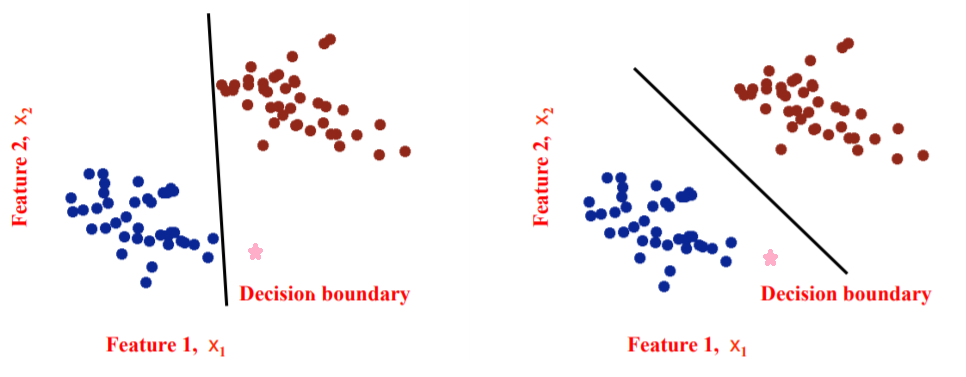

#### Characteristics of support vectors

1. Support vectors are data points that lie on and within the margin boundaries. <br>
2. They are closest from the decision boundary when compared to other data points.<br>
3. They are the only data points out of all the points in the training data that determine the optimal hyperplane in a support vector classifier.<br>
4. They are the data points in the training data that have non-zero Lagrange multipliers $\alpha_i$ associated with them.

#### Benefit of solving the dual problem

As discussed in the lecture, for minimization problems, the solution to the primal problem can never be better than the solution to the relevant dual problem. Mathematically, this can be expressed as $\max_\alpha\min_\mathbf{w} L\ (\textrm{dual solution})\leq \min_\mathbf{w}\max_\alpha L\ (\textrm{primal solution})$ and it intuitively makes sense because max-min of a function is always less than or equal to min-max. Besides, after training a model and finding $\alpha_i$'s, evaluating inner products between the features of test data points and the data points in the training data is all that is required to make predictions. Moreover, since all $\alpha_i$'s except those of support vectors are equal to zero, computing inner products between the features of a test data point and the support vectors would suffice to predict the class of that data point [6]. Further, solving the primal problem involves a quadratic optimization problem with number of variables equal to the number of features in a training data point. On the other hand, solving the dual problem also involves a quadratic optimization problem, however, with number of variables equal to the number of training data points. Thus, in scenarios where dimension of training data points is much larger than the number of training data points i.e. when the number of features >> the number of samples, it is possible to solve the dual problem much faster than the primal.

## 3. Formulating the primal problem and deriving its dual in case of multiple classes

#### Primal problem for multi-class classifier

Once again, let us assume there are N data points $(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), ..., (\mathbf{x}_N, y_N)$ and let there be K classes, i.e., $y_i \in \{1,2,...,K\}$ . Using the one against all approach discussed in the lecture, we need to train $k\left(k-1\right)\over 2$ classifiers where each one is trained on data from two classes. Now, let us consider a classifier trained on classes $i$ and $j$. The primal problem for this classifier is defined as follows:

$$\textrm{min}_{\mathbf{w}_{ij}}\ \mathbf{w}_{ij}^T.\mathbf{w}_{ij} + C\sum_{k} \xi_{{ij}_k}$$
$$\textrm{subject to}\ \mathbf{w}_{ij}^T.\mathbf{x}_k \geq 1 - \xi_{{ij}_k}, \textrm{if } y_k=i$$
$$\mathbf{w}_{ij}^T.\mathbf{x}_k \leq -1 + \xi_{{ij}_k}, \textrm{if } y_k=j$$
$$\xi_{{ij}_k} \geq 0$$

#### Deriving the dual problem

In this primal problem, we wish to minimize the quantity $\mathbf{w}_{ij}^T.\mathbf{w}_{ij} + C\sum_{k} \xi_{{ij}_k}$, subject to the above constraints. Using the method of Lagrange multipliers, the Lagrange function can be formulated as -

$$L = \mathbf{w}_{ij}^T.\mathbf{w}_{ij} + C\sum_{k} \xi_{{ij}_k} + \sum_{k:y_k=i} \alpha_k \left[1 - \left(\mathbf{w}_{ij}^T.\mathbf{x}_k\right) - \xi_{{ij}_k}\right] + \sum_{k:y_k=j} \alpha_k \left[1 + \left(\mathbf{w}_{ij}^T.\mathbf{x}_k\right) - \xi_{{ij}_k}\right] + \sum_{k} \beta_k \left(- \xi_{{ij}_k}\right)$$

Here, $\{\alpha_k\}$ and $\{\beta_k\}$ are respectively the Lagrange multipliers corresponding to the two inequality constraints and $\alpha_k, \beta_k \geq 0\ \forall\ k$. By finding the partial derivatives of this Lagrange function $L$ with respect to the primal variable $\mathbf{w}_{ij}$ and $\xi_{{ij}_k}$, and setting them to 0, we get

\begin{align*}
\frac{\partial L}{\partial \mathbf{w}_{ij}} &= \frac{\partial}{\partial \mathbf{w}_{ij}} \left\{\mathbf{w}_{ij}^T.\mathbf{w}_{ij} + \sum_{k:y_k=i} \alpha_k \left[1 - \left(\mathbf{w}_{ij}^T.\mathbf{x}_k\right) - \xi_{{ij}_k}\right] + \sum_{k:y_k=j} \alpha_k \left[1 + \left(\mathbf{w}_{ij}^T.\mathbf{x}_k\right) - \xi_{{ij}_l}\right]\right\}\\
&= 2\mathbf{w}_{ij} + \sum_{k:y_k=i} \alpha_k \left(-\mathbf{x}_k\right) + \sum_{k:y_k=j} \alpha_k \left(\mathbf{x}_k\right)\\
&= 2\mathbf{w}_{ij} - \sum_{k:y_k=i} \alpha_k \mathbf{x}_k + \sum_{k:y_k=j} \alpha_k \mathbf{x}_k = 0 \Rightarrow \mathbf{w}_{ij} = \frac{1}{2} \left(\sum_{k:y_k=i} \alpha_k \mathbf{x}_k - \sum_{k:y_k=j} \alpha_k \mathbf{x}_k\right)\\
\frac{\partial L}{\partial \xi_{{ij}_k}} &= \frac{\partial}{\partial \xi_{{ij}_k}} \left\{C\sum_{k} \xi_{{ij}_k} + \sum_{k:y_k=i} \alpha_k \left[1 - \left(\mathbf{w}_{ij}^T.\mathbf{x}_k\right) - \xi_{{ij}_k}\right] + \sum_{k:y_k=j} \alpha_k \left[1 + \left(\mathbf{w}_{ij}^T.\mathbf{x}_k\right) - \xi_{{ij}_k}\right] + \sum_{k} \beta_k \left(- \xi_{{ij}_k}\right)\right\}\\
&= C + \alpha_k \left(-1\right) + \beta_k \left(-1\right)\\
&= C - \alpha_k - \beta_k = 0 \Rightarrow C = \alpha_k + \beta_k
\end{align*}

Moreover, the second order partial derivative of $L$ with respect to $\mathbf{w}_{ij}$ is,
$$\frac{\partial^2 L}{\partial \mathbf{w}_{ij}^2} = \frac{\partial}{\partial \mathbf{w}_{ij}} \left(2\mathbf{w}_{ij} - \sum_{k:y_k=i} \alpha_k \mathbf{x}_k + \sum_{k:y_k=j} \alpha_k \mathbf{x}_k\right) = 2 > 0$$

Thus, $\mathbf{w}_{ij} = \frac{1}{2} \left(\sum_{k:y_k=i} \alpha_k \mathbf{x}_k - \sum_{k:y_k=j} \alpha_k \mathbf{x}_k\right)$ minimizes $L$ given all $\alpha_k$'s. Further, since $C = \alpha_k + \beta_k$, all $\alpha_k$ and $\beta_k$ must not exceed $C$ as $\alpha_k, \beta_k \geq 0\ \forall\ k$. In other words, $0 \leq \alpha_k \leq C$ and $0 \leq \beta_k \leq C$. Next, by substituting $\mathbf{w}_{ij}$ and $C$ into the Lagrange function, we get

\begin{align*}
L &= \mathbf{w}_{ij}^T.\left[\frac{1}{2} \left(\sum_{k:y_k=i} \alpha_k \mathbf{x}_k - \sum_{k:y_k=j} \alpha_k \mathbf{x}_k\right)\right] + \sum_{k} \left(\alpha_k + \beta_k\right)\xi_{{ij}_k} + \sum_{k:y_k=i} \alpha_k \left[1 - \left(\mathbf{w}_{ij}^T.\mathbf{x}_k\right) - \xi_{{ij}_k}\right] + \sum_{k:y_k=j} \alpha_k \left[1 + \left(\mathbf{w}_{ij}^T.\mathbf{x}_k\right) - \xi_{{ij}_k}\right] + \sum_{k} \beta_k \left(- \xi_{{ij}_k}\right)\\
&= \frac{1}{2}\mathbf{w}_{ij}^T.\left(\sum_{k:y_k=i} \alpha_k \mathbf{x}_k - \sum_{k:y_k=j} \alpha_k \mathbf{x}_k\right) + \sum_{k} \alpha_k\xi_{{ij}_k} + \sum_{k} \beta_k\xi_{{ij}_k} + \sum_{k} \alpha_k - \sum_{k:y_k=i} \alpha_k \mathbf{w}_{ij}^T.\mathbf{x}_k + \sum_{k:y_k=j} \alpha_k \mathbf{w}_{ij}^T.\mathbf{x}_k - \sum_{k} \alpha_k\xi_{{ij}_k} - \sum_{k} \beta_k \xi_{{ij}_k}\\
&= \frac{1}{2}\mathbf{w}_{ij}^T.\left(\sum_{k:y_k=i} \alpha_k \mathbf{x}_k - \sum_{k:y_k=j} \alpha_k \mathbf{x}_k\right) + \sum_{k} \alpha_k - \mathbf{w}_{ij}^T.\left(\sum_{k:y_k=i} \alpha_k \mathbf{x}_k\right) + \mathbf{w}_{ij}^T.\left(\sum_{k:y_k=j} \alpha_k \mathbf{x}_k\right)\\
&= \sum_{k} \alpha_k - \frac{1}{2}\mathbf{w}_{ij}^T.\left(\sum_{k:y_k=i} \alpha_k \mathbf{x}_k\right) + \frac{1}{2}\mathbf{w}_{ij}^T.\left(\sum_{k:y_k=j} \alpha_k \mathbf{x}_k\right)\\
&= \sum_{k} \alpha_k - \frac{1}{2}\left[\frac{1}{2} \left(\sum_{k:y_k=i} \alpha_k \mathbf{x}_k^T - \sum_{k:y_k=j} \alpha_k \mathbf{x}_k^T\right)\right].\left(\sum_{k:y_k=i} \alpha_k \mathbf{x}_k\right) + \frac{1}{2}\left[\frac{1}{2} \left(\sum_{k:y_k=i} \alpha_k \mathbf{x}_k^T - \sum_{k:y_k=j} \alpha_k \mathbf{x}_k^T\right)\right].\left(\sum_{k:y_k=j} \alpha_k \mathbf{x}_k\right)\\
&= \sum_{k} \alpha_k - \frac{1}{4}\sum_{l:y_l=i} \sum_{k:y_k=i} \alpha_l \alpha_k \mathbf{x}_l^T \mathbf{x}_k + \frac{1}{4}\sum_{l:y_l=j} \sum_{k:y_k=i} \alpha_l \alpha_k \mathbf{x}_l^T \mathbf{x}_k + \frac{1}{4}\sum_{l:y_l=i} \sum_{k:y_k=j} \alpha_l \alpha_k \mathbf{x}_l^T \mathbf{x}_k - \frac{1}{4}\sum_{l:y_l=j} \sum_{k:y_k=j} \alpha_l \alpha_k \mathbf{x}_l^T \mathbf{x}_k\\
&= \sum_{k} \alpha_k - \frac{1}{4}\sum_{l:y_l=i} \sum_{k:y_k=i} \alpha_l \alpha_k \mathbf{x}_l^T \mathbf{x}_k - \frac{1}{4}\sum_{l:y_l=j} \sum_{k:y_k=j} \alpha_l \alpha_k \mathbf{x}_l^T \mathbf{x}_k + \frac{1}{2}\sum_{l:y_l=j} \sum_{k:y_k=i} \alpha_l \alpha_k \mathbf{x}_l^T \mathbf{x}_k
\end{align*}

Therefore, the Lagrange dual problem is to maximize this function $L$ subject to the constraint $0 \leq \alpha_k \leq C$. <br>
In this way, we need to train $k(k-1)\over 2$ classifiers to build a multi-class classifier that works for $k$ classes.

### References

1. Duda, Richard O., Peter E. Hart, and David G. Stork. Pattern Classification. John Wiley & Sons, 2012. <br>
2. CSE 555 Intoduction to Pattern Recognition Lecture Slides by Prof. Wen Dong <br>
3. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html <br>
4. https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati <br>
5. http://sli.ics.uci.edu/Classes/2016W-178?action=download&upname=07_svm.pdf <br>
6. http://cs229.stanford.edu/notes/cs229-notes3.pdf <br>
7. http://yann.lecun.com/exdb/mnist/